S(t)は感受性宿主数、I(t)は感染者数（症状のない者も含む）、R(t) は回復者数である。回復した者は、再度感染しないものとする。
$$ 
\begin{align*}
\frac{dS(t)}{dt} &= -\beta S(t) I(t) \\
\frac{dI(t)}{dt} &= \beta S(t) I(t) - \gamma I(t) \\
\frac{dR(t)}{dt} &= \gamma I(t)
\end{align*}
$$

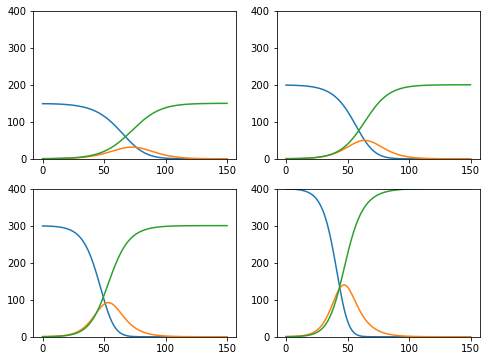

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def sir_cnt(v, t, beta, gamma):
    S, I, R = v
    x = beta * S * R   # その日の新たな感染者数
    dS = -x            # 感受性宿主の差分
    dR = gamma * I     # 感染者の中でその日に回復する数（回復者数の差分）
    dI = x - dR        # 感染者数の増減
    return np.array([dS, dI, dR])

beta = 0.001      
gamma = 0.1       
Sary = [149, 199, 299, 399]
I = 1
R = 0
t = np.linspace(0., 150, 151)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(8, 6))
axlist = [ax0, ax1, ax2, ax3]
for i in range(4):
    v = np.array([Sary[i], I, R])
    var_list = odeint(sir_cnt, v, t, args=(beta, gamma))
    axlist[i].plot(t ,var_list[:, 0], label="S")
    axlist[i].plot(t ,var_list[:, 1], label="I")
    axlist[i].plot(t ,var_list[:, 2], label="R")
    _ = axlist[i].set_ylim(0, 400)
